In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [2]:
# T4 Axon Terminals

filenames_axons =['SplitT4c_GC6f_Edges_001_2020-11-09_12.15_Ftrace_Edges_mean_axons',
                  'SplitT4c_GC6f_Edges_006_2021-01-28_17.17_Ftrace_Edges_mean_axons',
                  'SplitT4c_GC6f_Edges_009_2021-04-21_15.42_Ftrace_Edges_mean_axons',
                  '2022_07_13_SplitT4c_GC6f_Edges_004_2022-07-13_14.43_Ftrace_Edges_mean_T4axons',
                  '2022_07_15_SplitT4c_GC6f_Edges_008_2022-07-15_14.07_Ftrace_Edges_mean_T4axons',
                  '2022_07_15_SplitT4c_GC6f_Edges_014_2022-07-15_16.58_Ftrace_Edges_mean_T4axons']

In [3]:
# T4 Dendrites

filenames_dend =['SplitT4c_GC6f_Edges_006_2021-01-28_17.17_Ftrace_Edges_mean_T4dend',
                 'SplitT4c_GC6f_Edges_009_2021-04-21_15.42_Ftrace_Edges_mean_T4dend',
                 '2022_07_13_SplitT4c_GC6f_Edges_004_2022-07-13_14.43_Ftrace_Edges_mean_T4dend',
                 '2022_07_15_SplitT4c_GC6f_Edges_008_2022-07-15_14.07_Ftrace_Edges_mean_T4dend',
                 '2022_07_15_SplitT4c_GC6f_Edges_014_2022-07-15_16.58_Ftrace_Edges_mean_T4dend']

In [4]:
# Import Data
time = np.load('time_Edges.npy')

for i in range(len(filenames_axons)):
    a = np.load(filenames_axons[i] + '.npy')
    if(i==0):
        Ftrace_all_axons = a
    if(i==1):
        Ftrace_all_axons = np.stack((Ftrace_all_axons,a), axis=3)   
    if(i>1):
        a = a[:,:,:,np.newaxis]
        Ftrace_all_axons = np.concatenate((Ftrace_all_axons,a), axis=3)
        
for i in range(len(filenames_dend)):
    b = np.load(filenames_dend[i] + '.npy')
    if(i==0):
        Ftrace_all_dend = b
    if(i==1):
        Ftrace_all_dend = np.stack((Ftrace_all_dend,b), axis=3)   
    if(i>1):
        b = b[:,:,:,np.newaxis]
        Ftrace_all_dend = np.concatenate((Ftrace_all_dend,b), axis=3)  

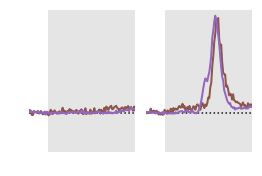

In [5]:
fig = plt.figure(figsize = (4, 2.6))

plt.subplots_adjust(wspace=0.1)

ax = fig.add_subplot(121)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all_dend[:,6,0,:], axis=1), color = 'C5', linewidth = 2)
plt.plot(time,np.mean(Ftrace_all_axons[:,6,0,:], axis=1), color = 'C4', linewidth = 2)
plt.axvspan(0, 9, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,7])
plt.ylim([-2.5,6.5])
plt.axis('off') 

ax = fig.add_subplot(122)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all_dend[:,2,0,:], axis=1), color = 'C5', linewidth = 2)
plt.plot(time,np.mean(Ftrace_all_axons[:,2,0,:], axis=1), color = 'C4', linewidth = 2)
plt.axvspan(0, 9, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,7])
plt.ylim([-2.5,6.5])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#FigS6_SplitT4c_Traces_dend_vs_axons_Edges.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

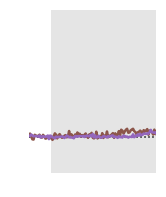

In [6]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all_dend[:,6,0,:], axis=1), color = 'C5', linewidth = 2.5)
plt.plot(time,np.mean(Ftrace_all_axons[:,6,0,:], axis=1), color = 'C4', linewidth = 2.5)
plt.axvspan(0, 9, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,7])
plt.ylim([-2,7])
plt.axis('off') 

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\2021_05_03 Motion Opponency Presentation\\
#SplitT4c_GC6f_Edges_Ftraces_dend_vs_axon_ND.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

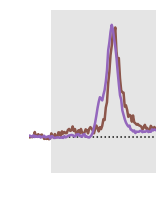

In [7]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all_dend[:,2,0,:], axis=1), color = 'C5', linewidth = 2.5)
plt.plot(time,np.mean(Ftrace_all_axons[:,2,0,:], axis=1), color = 'C4', linewidth = 2.5)
plt.axvspan(0, 9, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,7])
plt.ylim([-2,7])
plt.axis('off') 

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\2021_05_03 Motion Opponency Presentation\\
#SplitT4c_GC6f_Edges_Ftraces_dend_vs_axon_PD.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

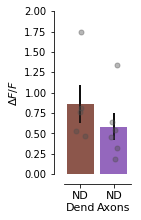

In [8]:
# Make Bar plot

pos = [0,1]

fig = plt.figure(figsize = (0.6*len(pos),3))
plt.subplots_adjust(wspace = 0.5)
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [np.max(Ftrace_all_dend[:,6,0,:],axis=0), np.max(Ftrace_all_axons[:,6,0,:],axis=0)]
colors = ['C5', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xticks(pos)
ax.set_xticklabels(('ND\nDend','ND\nAxons', 'PD\nDend','PD\nAxons'), size=11)
ax.set_ylabel('$\Delta F/F$', size=11)
plt.ylim([0,2])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\2021_05_03 Motion Opponency Presentation\\
#SplitT4c_GC6f_Edges_ND_boxplot_dend_vs_axon.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

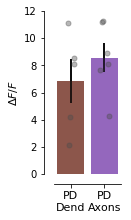

In [9]:
# Make Bar plot

pos = [0,1]

fig = plt.figure(figsize = (0.6*len(pos),3))
plt.subplots_adjust(wspace = 0.5)
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [np.max(Ftrace_all_dend[:,2,0,:],axis=0), np.max(Ftrace_all_axons[:,2,0,:],axis=0)]
colors = ['C5', 'C4']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.bar(pos[j], height = np.mean(data[j]), yerr=[stats.sem(data[j])], color=colors[j])
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color='0.3', alpha=0.4, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xticks(pos)
ax.set_xticklabels(('PD\nDend','PD\nAxons', 'PD\nDend','PD\nAxons'), size=11)
ax.set_ylabel('$\Delta F/F$', size=11)
plt.ylim([0,12])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\2021_05_03 Motion Opponency Presentation\\
#SplitT4c_GC6f_Edges_PD_boxplot_dend_vs_axon.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()